<a href="https://colab.research.google.com/github/silverstar0727/TIL/blob/main/DeepLearning/%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%99%80%EB%A1%9C%EC%84%9C%EA%B8%B0/multilabel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Test Set Distribution')

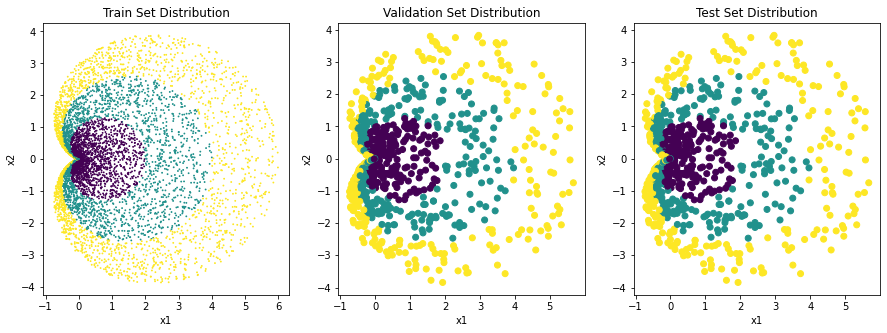

In [14]:
import numpy as np
import matplotlib.pyplot as plt

r = np.random.rand(10000)*3
theta = np.random.rand(10000)*2*np.pi
y = r.astype(int) # y는 r을 정수형으로 변환한 값 => 적당한 거리에 따라서 라벨링이 3단계로 되도록...
r = r*(np.cos(theta) + 1)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
X = np.array([x1, x2]).T

train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[8000:9000, :], y[8000:9000]

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c = train_y, s = 0.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:, 0], val_X[:, 1], c = val_y)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:, 0], test_X[:, 1], c = test_y)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

In [15]:
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Lineaer(in_features=2, out_features=3, bias=True)

    def forward(self, x):
        x = self.linear(x)
        return x

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [19]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
import torch

cls_loss = nn.CrossEntropyLoss()

model = MLPModel()
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{num_params} parameters")

lr = 0.0005
optimizer = optim.SGD(model.parameters(), lr = lr)

list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 5000
for i in range(epoch):
    model.train()
    optimizer.zero_grad()

    input_X = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y).long() # int 타입으로 변환하기 위함(cross entropy에서는 라벨의 순서로 평가하므로...)
    pred_y = model(input_X)
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())

    model.eval()
    optimizer.zero_grad()
    input_X = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y).long()
    pred_y = model(input_X)
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())

    if i % 200 == 0:
        model.eval()
        optimizer.zero_grad()
        input_X = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_X).detach().max(dim = 1)[1].numpy() # 왜이렇게 바꾸지?
        acc = accuracy_score(true_y, pred_y)
        list_acc.append(acc)
        list_acc_epoch.append(i)

1203 parameters


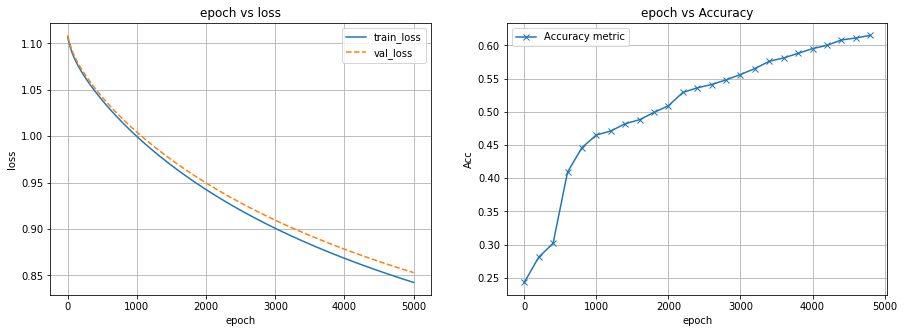

In [20]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()
